In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\train_energy_data.csv')
df.sample(5)

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
28,Residential,30259,35,14,15.39,Weekend,3566.01
635,Residential,25361,77,26,24.09,Weekend,3937.59
88,Residential,6654,21,24,15.00,Weekday,2497.72
690,Commercial,7040,4,20,22.82,Weekday,2727.89
798,Industrial,31311,60,27,17.31,Weekday,5168.99


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1000 non-null   object 
 1   Square Footage       1000 non-null   int64  
 2   Number of Occupants  1000 non-null   int64  
 3   Appliances Used      1000 non-null   int64  
 4   Average Temperature  1000 non-null   float64
 5   Day of Week          1000 non-null   object 
 6   Energy Consumption   1000 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB


In [5]:
df['Building Type'].unique(),df['Day of Week'].unique()

(array(['Residential', 'Commercial', 'Industrial'], dtype=object),
 array(['Weekday', 'Weekend'], dtype=object))

In [6]:
df.describe()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption
count,1000.000,1000.000000,1000.000000,1000.000000,1000.000000
mean,25462.388,48.372000,25.606000,22.611390,4166.252570
std,14294.554,29.061972,14.105166,7.139943,933.313064
min,560.000,1.000000,1.000000,10.050000,1683.950000
25%,13169.750,22.000000,13.000000,16.475000,3509.482500
50%,25477.000,47.000000,26.000000,22.815000,4175.730000
75%,37446.250,73.250000,38.000000,28.850000,4863.850000
max,49997.000,99.000000,49.000000,34.990000,6530.600000


<Axes: xlabel='Square Footage', ylabel='Density'>

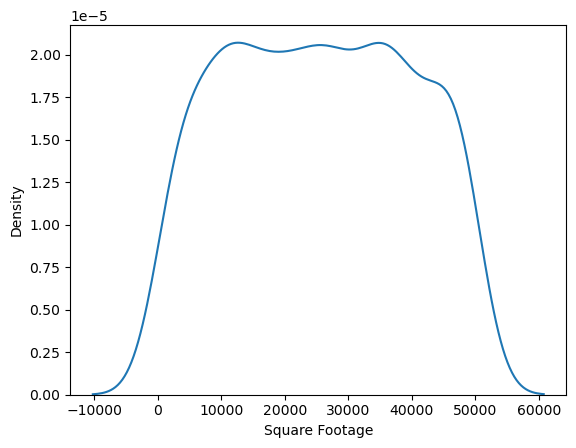

In [7]:
sns.kdeplot(df['Square Footage'])

<Axes: xlabel='Square Footage', ylabel='Energy Consumption'>

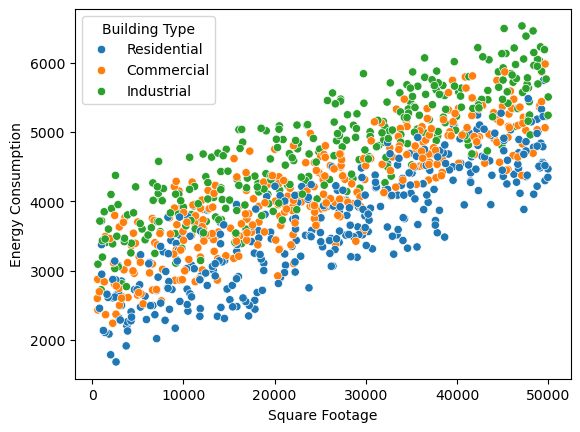

In [8]:
sns.scatterplot(x=df['Square Footage'],y=df['Energy Consumption'],hue=df['Building Type'])

<Axes: xlabel='Number of Occupants', ylabel='Energy Consumption'>

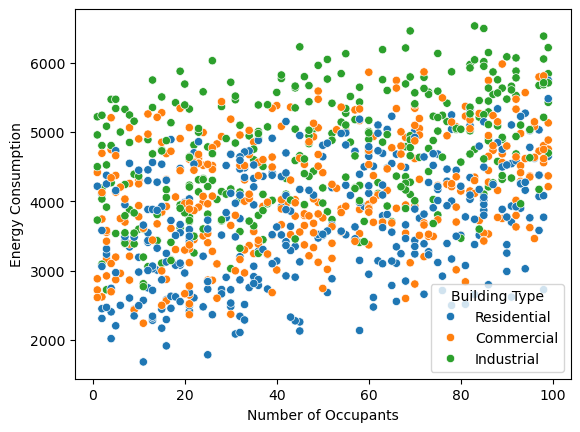

In [9]:
sns.scatterplot(x=df['Number of Occupants'],y=df['Energy Consumption'],hue=df['Building Type'])

<Axes: xlabel='Appliances Used', ylabel='Energy Consumption'>

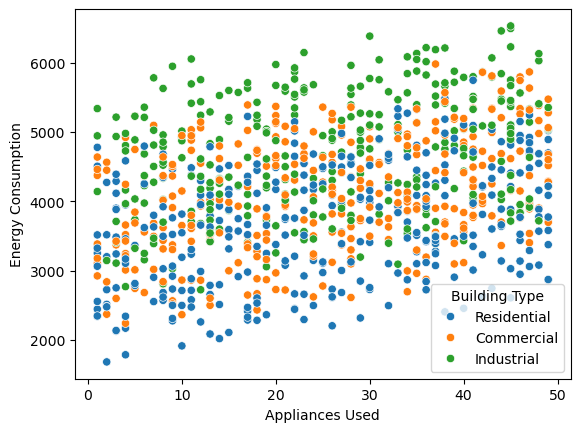

In [10]:
sns.scatterplot(x=df['Appliances Used'],y=df['Energy Consumption'],hue=df['Building Type'])

<Axes: xlabel='Average Temperature', ylabel='Energy Consumption'>

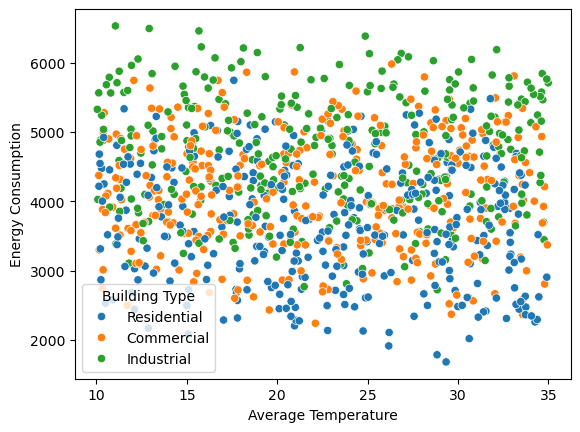

In [11]:
sns.scatterplot(x=df['Average Temperature'],y=df['Energy Consumption'],hue=df['Building Type'])

Day of Week
Weekday    2114338.80
Weekend    2051913.77
Name: Energy Consumption, dtype: float64

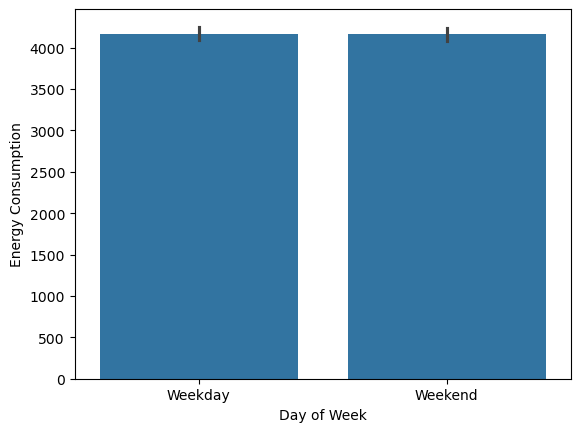

In [12]:
sns.barplot(x=df['Day of Week'],y=df['Energy Consumption'])
df.groupby('Day of Week')['Energy Consumption'].sum()

Building Type
Commercial     1387687.92
Industrial     1501040.21
Residential    1277524.44
Name: Energy Consumption, dtype: float64

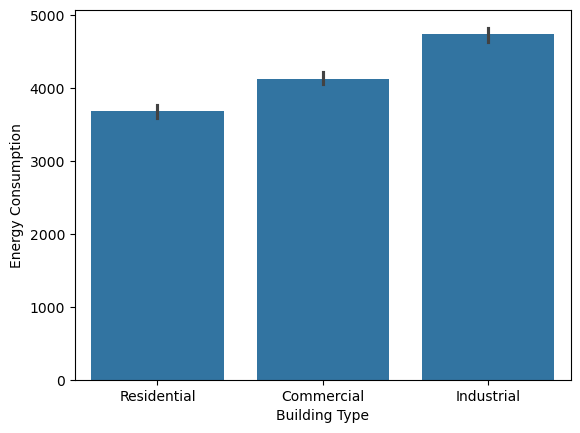

In [13]:
sns.barplot(x=df['Building Type'],y=df['Energy Consumption'])
df.groupby('Building Type')['Energy Consumption'].sum()

In [14]:
# deleting day of week column since energy consumption is al same on both weekdays and weekends
df = df.drop(columns=['Day of Week'])
df.sample(5)

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption
477,Commercial,39059,57,47,28.74,5319.27
582,Commercial,40983,66,47,12.96,5634.35
5,Commercial,37377,26,32,16.24,4687.67
404,Residential,43582,92,4,18.90,4584.62
682,Commercial,24395,60,5,15.03,3844.62


In [15]:
#using frequency encoding in Building Type column
frequency = df['Building Type'].value_counts()
df['Category_encoded'] = df['Building Type'].map(frequency)

In [16]:
df.rename(columns={'Category_encoded':'Building_Encoded'},inplace=True)
df.sample(5)

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption,Building_Encoded
94,Commercial,44361,30,39,22.49,5185.62,336
808,Commercial,16871,93,38,33.96,4413.74,336
138,Commercial,9517,82,46,13.20,4149.86,336
504,Industrial,45504,24,32,24.99,5580.25,317
329,Industrial,38501,84,3,32.04,5214.85,317


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
model=LinearRegression()

In [18]:
x_train,x_test,y_train,y_test= train_test_split(df.drop(columns=['Building Type','Energy Consumption']),df['Energy Consumption'],test_size=0.1,random_state=0)
x_train=pd.DataFrame(x_train,columns=['Square Footage','Number of Occupants','Appliances Used','Average Temperature','Building_Encoded'])
x_test=pd.DataFrame(x_test,columns=['Square Footage','Number of Occupants','Appliances Used','Average Temperature','Building_Encoded'])

In [19]:
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Root Mean Squared Error: ", rmse)

# Calculate R² score
r2 = r2_score(y_test, y_pred)
print("R² score: ", r2)

Root Mean Squared Error:  69.94948134373686
R² score:  0.9942344006896845
